### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 3

# Understanding the Problem

Before jumping into code, always start by understanding the problem. Our goal is to 
predict the number of ice creams sold (𝑦) based on the daily temperature (𝑋). Imagine a 
local ice cream shop keeps track of the daily temperature and the number of ice creams 
sold on those days.

<table>
    <thead>
        <td>Temperature (C)</td>
        <td>Ice Creams Sold</td>
    </thead>
    <tbody>
        <tr>
            <td>18</td>
            <td>80</td>
        </tr>
        <tr>
            <td>22</td>
            <td>150</td>
        </tr>
        <tr>
            <td>27</td>
            <td>200</td>
        </tr>
        <tr>
            <td>30</td>
            <td>300</td>
        </tr>
        <tr>
            <td>35</td>
            <td>350</td>
        </tr>
    </tbody>
</table>

## Importing Libraries and Loading Data

In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample dataset (temperature and ice creams sold)
data = {
    "Temperature": [18, 22, 27, 30, 35],
    "Ice Creams Sold": [80, 150, 200, 300, 350],
}
# Convert to DataFrame
df = pd.DataFrame(data)

## Visualizing the Data

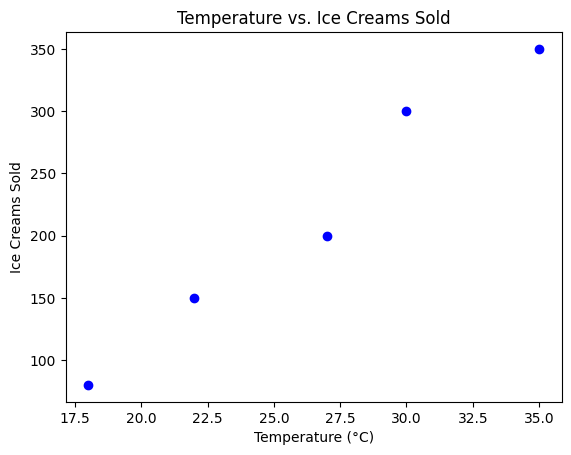

In [3]:
# Scatter plot to visualize the data
plt.scatter(df["Temperature"], df["Ice Creams Sold"], color="blue")
plt.title("Temperature vs. Ice Creams Sold")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Creams Sold")
plt.show()

## Splitting Data into Training and Testing Sets

In [7]:
# Standardize the data
df = (df - df.mean()) / df.std()
# Display the standardized data
print(df)

# Normalize the data
df = (df - df.min()) / (df.max() - df.min())
# Display the normalized data
print(df)

# Split the data into features (X) and target variable (y)
X = df[["Temperature"]]
y = df["Ice Creams Sold"]
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Temperature  Ice Creams Sold
0    -1.262053        -1.239955
1    -0.661075        -0.601743
2     0.090147        -0.145877
3     0.540880         0.765855
4     1.292101         1.221721
   Temperature  Ice Creams Sold
0     0.000000         0.000000
1     0.235294         0.259259
2     0.529412         0.444444
3     0.705882         0.814815
4     1.000000         1.000000


## Training The Linear Regression Model

In [9]:
# Create a linear regression model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

The .fit() method finds the best-fitting line by calculating the intercept and slope 
(coefficients) that minimize the error between predicted and actual values.

## Interpreting the Model

In [10]:
# Model coefficients (slope and intercept)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

Intercept: 0.6296296296296297
Slope: 0.28462906037207825


- Intercept

    Predicted number of ice creams sold when the temperature is 0°C (though this 
might not be practical, it’s mathematically useful). 

- Slope

    Increase in the number of ice 
creams sold for every 1°C rise in temperature.

## Making Predictions

In [11]:
# Predict ice cream sales for the test set
y_pred = model.predict(X_test)
# Compare predicted vs actual values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison)

   Actual  Predicted
0     0.0  -0.003953


## Evaluating The Model

In [12]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.5629305094254475e-05


A lower MSE indicates that the model is accurately predicting the number of ice creams 
sold based on the temperature.

# Visualizing Data and Regression Lines

### Scatter Plots for Raw Data
The first step in visualizing data for linear regression is creating a scatter plot. A scatter 
plot represents individual data points, where one axis (usually the x-axis) represents the 
independent variable (in this case, temperature), and the other axis (y-axis) represents 
the dependent variable (ice cream sales).

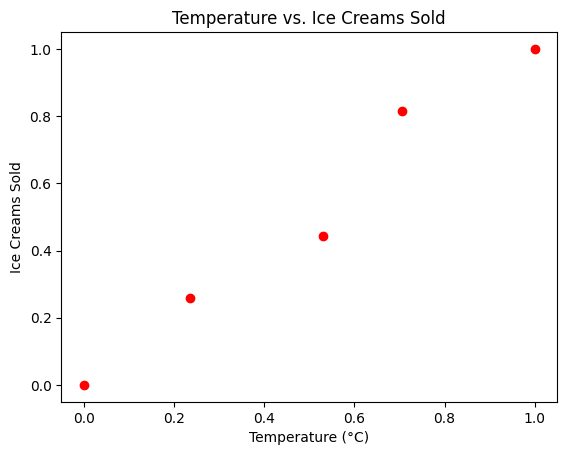

In [13]:
#  Scatter plot to visualize the raw data
plt.scatter(df["Temperature"], df["Ice Creams Sold"], color="red")
plt.title("Temperature vs. Ice Creams Sold")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Creams Sold")
plt.show()

## Visualizing the Regression Line


The closer the red line is to most of the blue 
dots, the better the model is at predicting ice cream sales based on the temperature. If 
the red line is too far from the blue dots or has a poor slope, it suggests the model might 
not be well-fitted to the data.

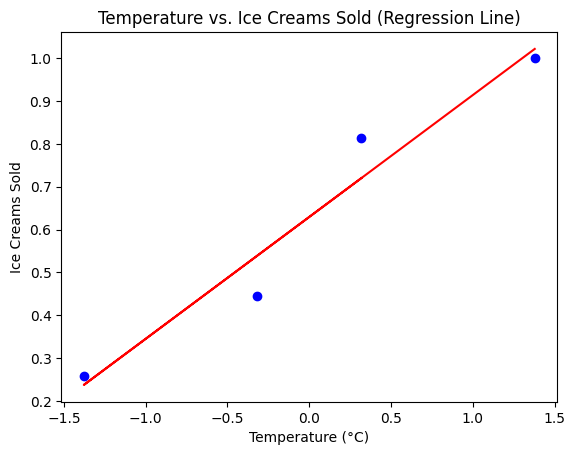

In [14]:
#  Scatter plot for raw data
plt.scatter(X_train, y_train, color="blue")
# Plot regression line
plt.plot(X_train, model.predict(X_train), color="red")
plt.title("Temperature vs. Ice Creams Sold (Regression Line)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Creams Sold")
plt.show()

## Residual Plots
A residual plot is another useful visualization to assess the quality of the regression model. 
It shows the difference between the actual and predicted values (i.e., the residuals). 
Ideally, the residuals should be randomly distributed around zero, suggesting that the 
model has captured the linear relationship well.

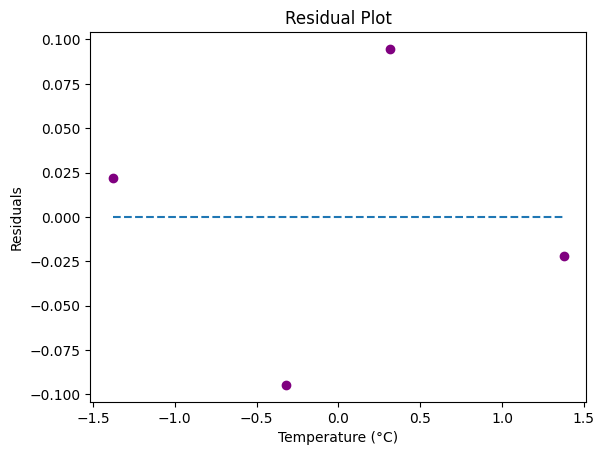

In [15]:
# Calculate residuals
residuals = y_train - model.predict(X_train)
# Plot residuals
plt.scatter(X_train, residuals, color="purple")
plt.hlines(y=0, xmin=X_train.min(), xmax=X_train.max(), linestyles="dashed")
plt.title("Residual Plot")
plt.xlabel("Temperature (°C)")
plt.ylabel("Residuals")
plt.show()

If the residuals are randomly scattered around the horizontal line (y=0), it indicates a good 
fit. Patterns in the residuals, like curves or clusters, might suggest the need for a more 
complex model (e.g., polynomial regression).

# Mini Challenge

## Download the DataSet

In [16]:
!kaggle datasets download -d devansodariya/student-performance-data

Dataset URL: https://www.kaggle.com/datasets/devansodariya/student-performance-data
License(s): CC0-1.0




  0%|          | 0.00/7.16k [00:00<?, ?B/s]
100%|██████████| 7.16k/7.16k [00:00<00:00, 7.31MB/s]


## Load the Dataset

In [17]:
# Load the dataset
data = pd.read_csv("student_data.csv")
# Display the first 5 rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Exploring The Dataset

The Documentation explaining the fields of the dataset is available here:

- https://archive.ics.uci.edu/dataset/320/student+performance

In [60]:
# Check for missing values
print(data.isnull().sum())

# display all columns
pd.set_option("display.max_columns", None)
# Display the first 5 rows
data.head()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Describe the data

In [19]:
# Describing basic Statistics of the data
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Creating Scatter Plot

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  school_MS  sex_M  \
0        4     1     1   

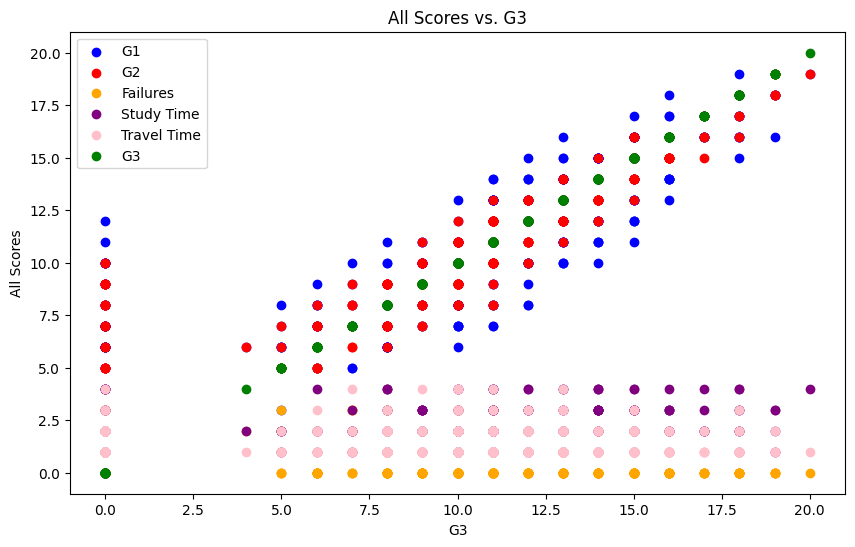

In [61]:
# remove string columns
no_string_data = pd.get_dummies(data, drop_first=True)
print(no_string_data)
# Display the first 5 rows
no_string_data.head()

# Scatter Plot of all features on same scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(no_string_data["G3"], no_string_data["G1"], color="blue", label="G1")
plt.scatter(no_string_data["G3"], no_string_data["G2"], color="red", label="G2")
# "failures", "absences", "traveltime"
plt.scatter(no_string_data["G3"], no_string_data["failures"], color="orange", label="Failures")
# plt.scatter(no_string_data["G3"], no_string_data["absences"], color="yellow", label="Absences")
plt.scatter(no_string_data["G3"], no_string_data["studytime"], color="purple", label="Study Time")
plt.scatter(no_string_data["G3"], no_string_data["traveltime"], color="pink", label="Travel Time")
plt.scatter(no_string_data["G3"], no_string_data["G3"], color="green", label="G3")
plt.title("All Scores vs. G3")
plt.xlabel("G3")
plt.ylabel("All Scores")
plt.legend()
plt.show()

From this we see `G1` and `G2` can closely predict our `G3` score.

### Creating Correlation Matrix

#### CorrelationMatrix for all the fields

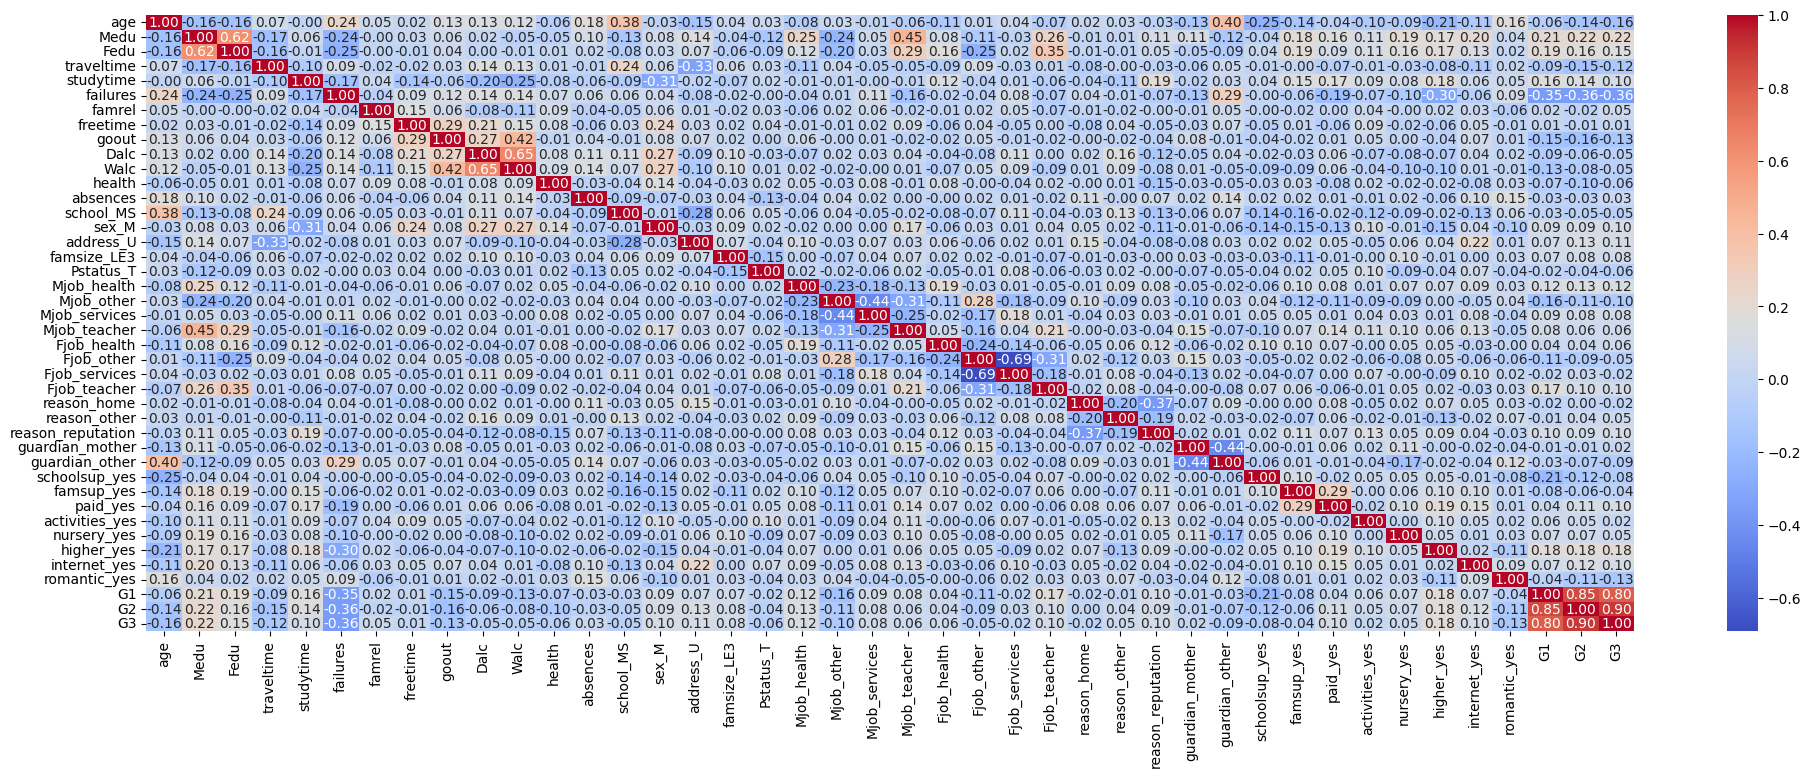

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation matrix
# make the G1, G2, G3 columns the last columns
cols = list(no_string_data.columns)
cols.remove("G1")
cols.remove("G2")
cols.remove("G3")
cols.append("G1")
cols.append("G2")
cols.append("G3")
no_string_data = no_string_data[cols]
corr_matrix = no_string_data.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#### Correlation Matrix for only Numeric Fields

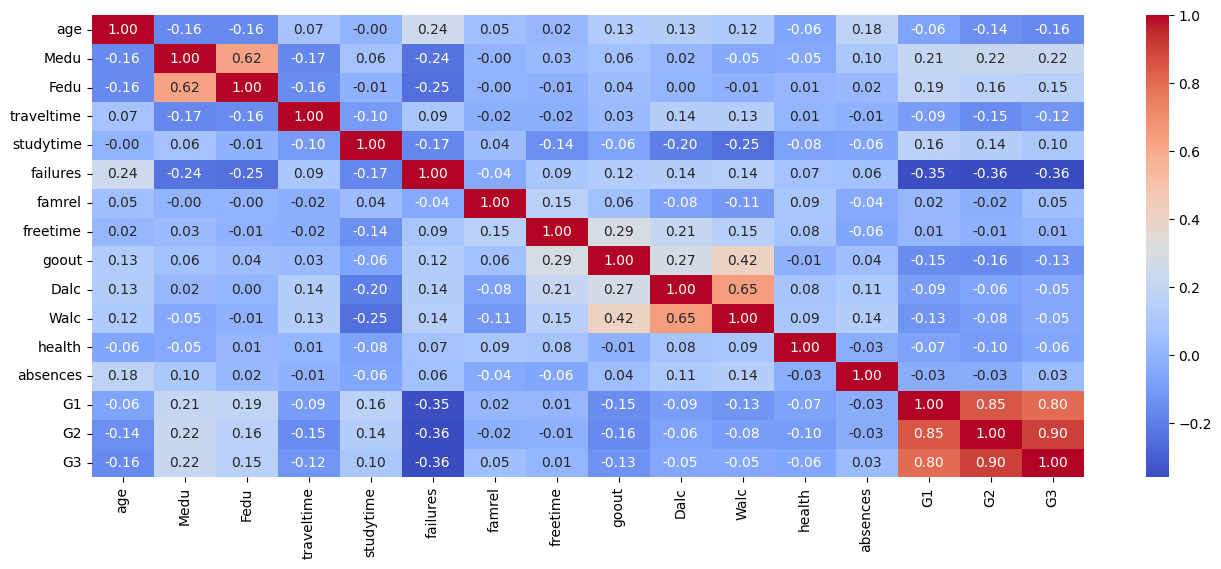

In [62]:
# Exclude non-numeric columns
string_dropped_data = data.select_dtypes(include=[float, int])
# Display the first 5 rows
string_dropped_data.head()

corr_matrix = string_dropped_data.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

- From the correlation Matrices we can see that `G1`, `G2`, `absences` and `traveltime` effect the `G3` score.

### Creating the Histogram

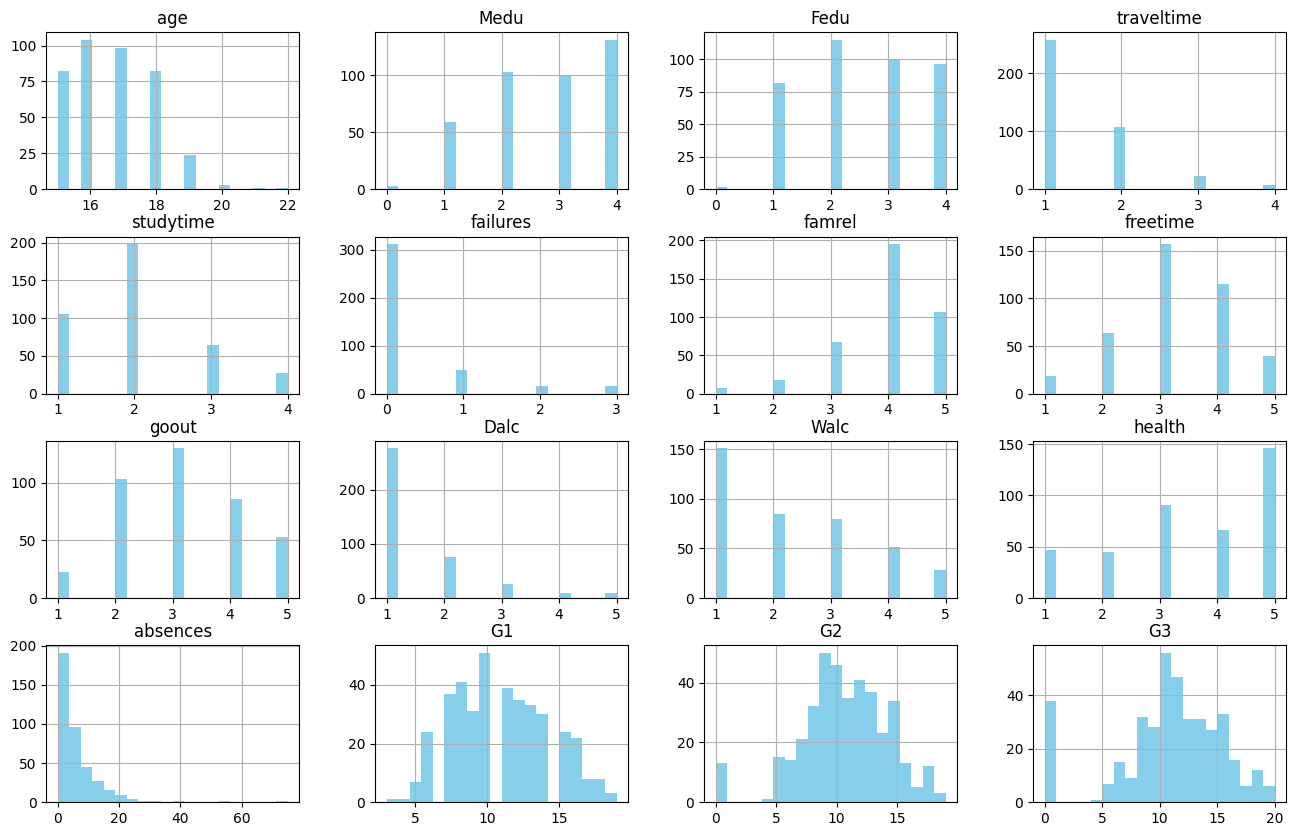

In [63]:
# Visualize distributions of numerical features
data.hist(bins=20, figsize=(16, 10), color="skyblue")
plt.show()

### PairWise Relation Plot

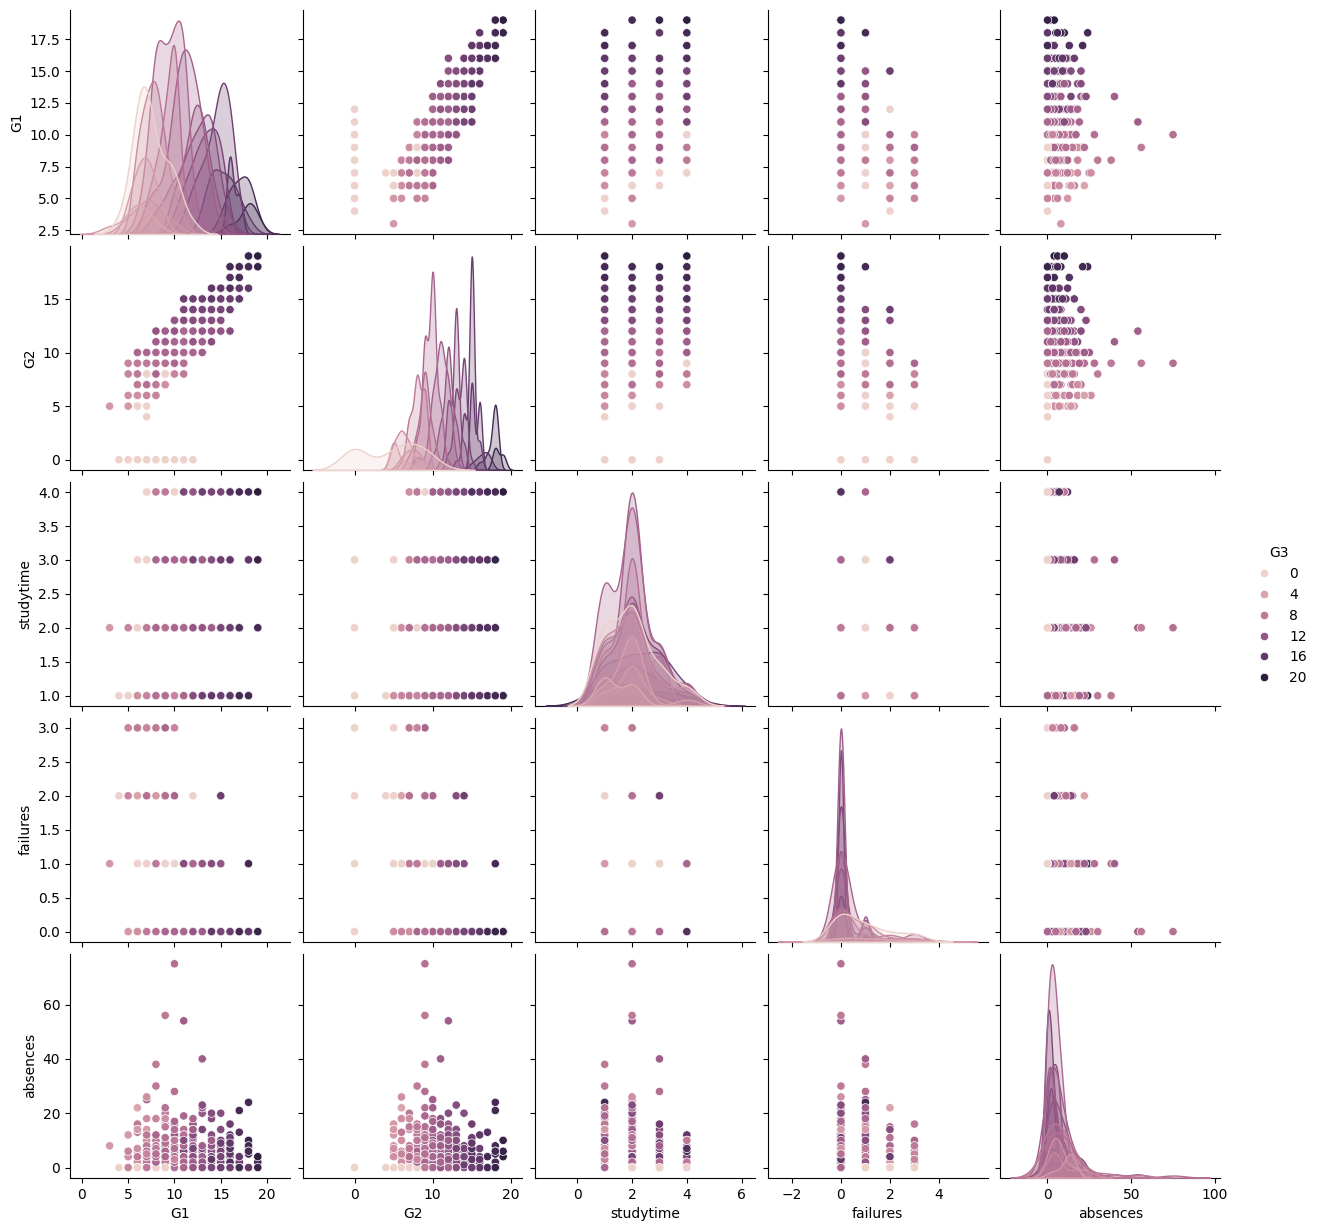

In [64]:
# PairWise Relation Plot of numerical features
sns.pairplot(
    data=no_string_data,
    hue="G3",
    vars=["G1", "G2", "studytime", "failures", "absences"],
)
plt.show()

## Training Simple Linear Regression


Splitting Data

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.preprocessing as preprocessing


# Select one feature for simple regression
X = data[["G2"]]
y = data["G3"]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training

In [76]:
# Create and fit the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Make predictions
y_pred = simple_model.predict(X_test)

Evaluating and visualizing

Multiple Linear Regression MAE: 1.0296006416012855
Multiple Linear Regression MSE: 3.141252069398176
Multiple Linear Regression R2 Score: 0.8482876642017013
Multiple Linear Regression RMSE: 1.7723577712747998


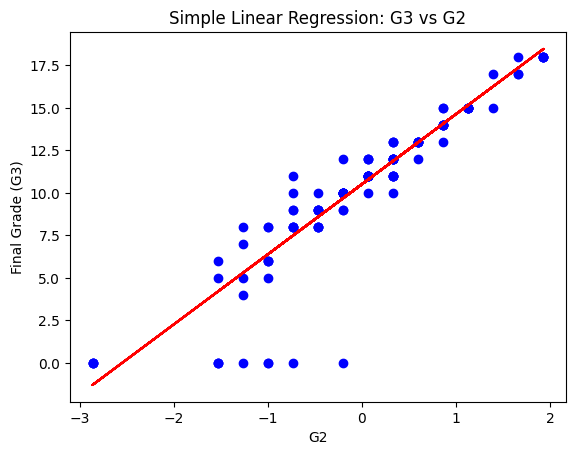

In [77]:
# Evaluate performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

print(f"Multiple Linear Regression MAE: {mean_absolute_error(y_test, y_pred_multi)}")
print(f"Multiple Linear Regression MSE: {mean_squared_error(y_test, y_pred_multi)}")
print(f"Multiple Linear Regression R2 Score: {r2_score(y_test, y_pred_multi)}")
print(
    f"Multiple Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi))}"
)

# Plot results
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.xlabel("G2")
plt.ylabel("Final Grade (G3)")
plt.title("Simple Linear Regression: G3 vs G2")
plt.show()

### Residual Plot

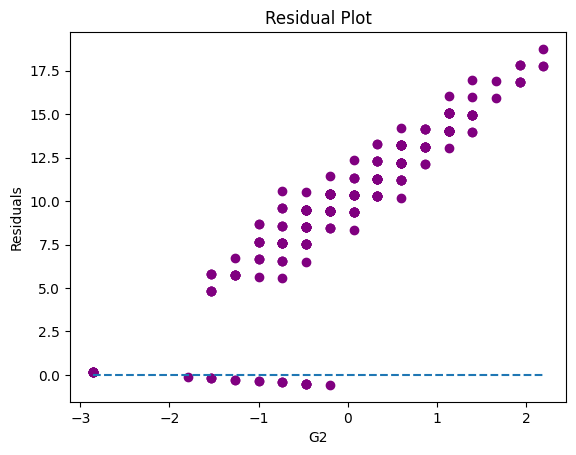

In [79]:
# Calculate residuals
residuals = y_train - model.predict(X_train)
# Plot residuals
plt.scatter(X_train, residuals, color="purple")
plt.hlines(y=0, xmin=X_train.min(), xmax=X_train.max(), linestyles="dashed")
plt.title("Residual Plot")
plt.xlabel("G2")
plt.ylabel("Residuals")
plt.show()

## Training Multiple Linear Regression Model

Splitting Data

In [90]:
# Select multiple features for multiple regression (you can experiment with feature selection)
X = data[
    ["G1", "G2", "studytime", "failures", "absences"]
]  # You can add or remove features
y = data["G3"]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Select multiple features for multiple regression (you can experiment with feature selection)
X = data[
    ["G1", "G2", "studytime", "failures", "absences"]
]  # You can add or remove features
y = data["G3"]

Training

In [91]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create and fit the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Make predictions
y_pred_multi = multi_model.predict(X_test)

Evaluating and Visualizing

Multiple Linear Regression MAE: 1.0296006416012855
Multiple Linear Regression MSE: 3.141252069398176
Multiple Linear Regression R2 Score: 0.8482876642017013
Multiple Linear Regression RMSE: 1.7723577712747998


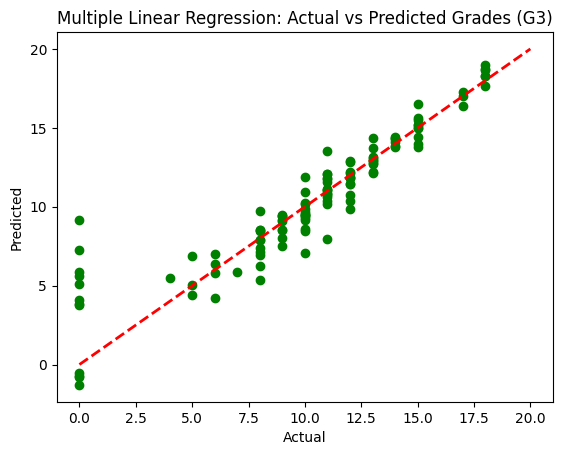

In [92]:
# Evaluate performance
print(f"Multiple Linear Regression MAE: {mean_absolute_error(y_test, y_pred_multi)}")
print(f"Multiple Linear Regression MSE: {mean_squared_error(y_test, y_pred_multi)}")
print(f"Multiple Linear Regression R2 Score: {r2_score(y_test, y_pred_multi)}")
print(
    f"Multiple Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi))}"
)
# Visualization for multiple regression
plt.scatter(y_test, y_pred_multi, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression: Actual vs Predicted Grades (G3)")
plt.show()

### Residual Plot

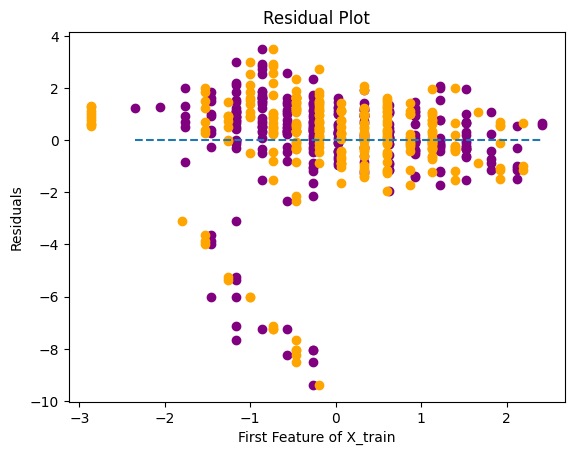

In [95]:
# Calculate residuals
residuals = y_train - multi_model.predict(X_train)
# Plot residuals
plt.scatter(X_train[:, 0], residuals, color="purple")  # Use the first feature for x-axis
plt.scatter(X_train[:, 1], residuals, color="orange")  # Use the second feature for x-axis
plt.hlines(y=0, xmin=X_train[:, 0].min(), xmax=X_train[:, 0].max(), linestyles="dashed")
plt.title("Residual Plot")
plt.xlabel("First Feature of X_train")
plt.ylabel("Residuals")
plt.show()

## Feature Engineering Bonus

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_GP  school_MS  sex_F  \
0     1     1       3         6   5   6   6       True      False   True   
1     1     1       3         4   5   5   6       True      False   True   
2     2     3       3        10   7   8  10       True      False   True   
3     1     1       5         2  15  14  15       True      False   True   
4     1     2       5         4   6  10  10       True      False   True   

   sex_M  address_R  address_U  famsize_GT3  famsize_LE3  Psta

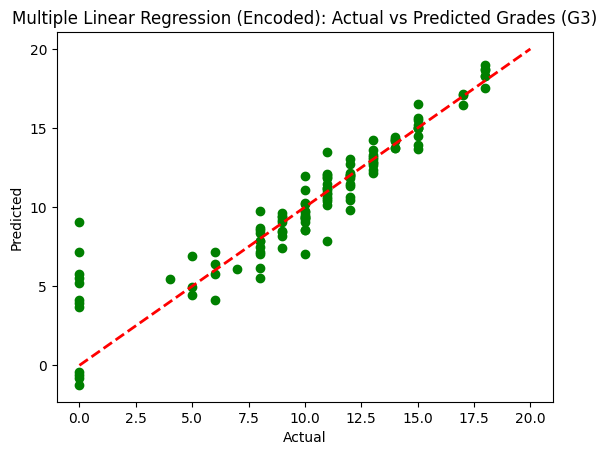

In [96]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(
    data,
)

# select multiple features for multiple regression
X = data_encoded[
    [
        "G1",
        "G2",
        "studytime",
        "failures",
        "absences",
        "studytime",
        "failures",
        "absences",
        "sex_M",
        "famsize_LE3",
        "famsize_GT3",
    ]
]  # You can add or remove features

print(data_encoded.head())

y = data_encoded["G3"]

# Continue with your train-test split and model training...

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the model
multi_model_encoded = LinearRegression()
multi_model_encoded.fit(X_train, y_train)

# Make predictions
y_pred_multi_encoded = multi_model_encoded.predict(X_test)

# Evaluate performance
print(
    f"Multiple Linear Regression (Encoded) MSE: {mean_squared_error(y_test, y_pred_multi_encoded)}"
)

print(
    f"Multiple Linear Regression (Encoded) R2 Score: {r2_score(y_test, y_pred_multi_encoded)}"
)

# Visualization for multiple regression
plt.scatter(y_test, y_pred_multi_encoded, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression (Encoded): Actual vs Predicted Grades (G3)")
plt.show()

### Residual Plot

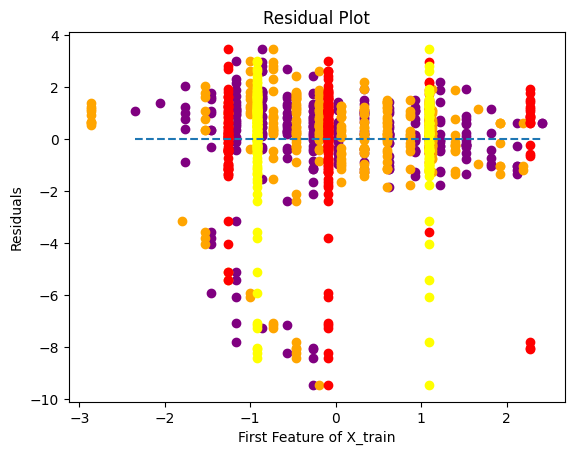

In [98]:
# Calculate residuals
residuals = y_train - multi_model_encoded.predict(X_train)
# Plot residuals
plt.scatter(
    X_train[:, 0], residuals, color="purple"
)  # Use the first feature for x-axis
plt.scatter(
    X_train[:, 1], residuals, color="orange"
)  # Use the second feature for x-axis

plt.scatter(
    X_train[:, 2], residuals, color="red"
)  # Use the third feature for x-axis
plt.scatter(
    X_train[:, 8], residuals, color="yellow"
)  # Use the eighth feature for x-axis
plt.hlines(y=0, xmin=X_train[:, 0].min(), xmax=X_train[:, 0].max(), linestyles="dashed")
plt.title("Residual Plot")
plt.xlabel("First Feature of X_train")
plt.ylabel("Residuals")
plt.show()